In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 200  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [4]:
data_df = pd.read_csv('breast_cancer_mod.csv')
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0


# Visualization

In [5]:
data_df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

<Axes: xlabel='target'>

<Figure size 1200x800 with 0 Axes>

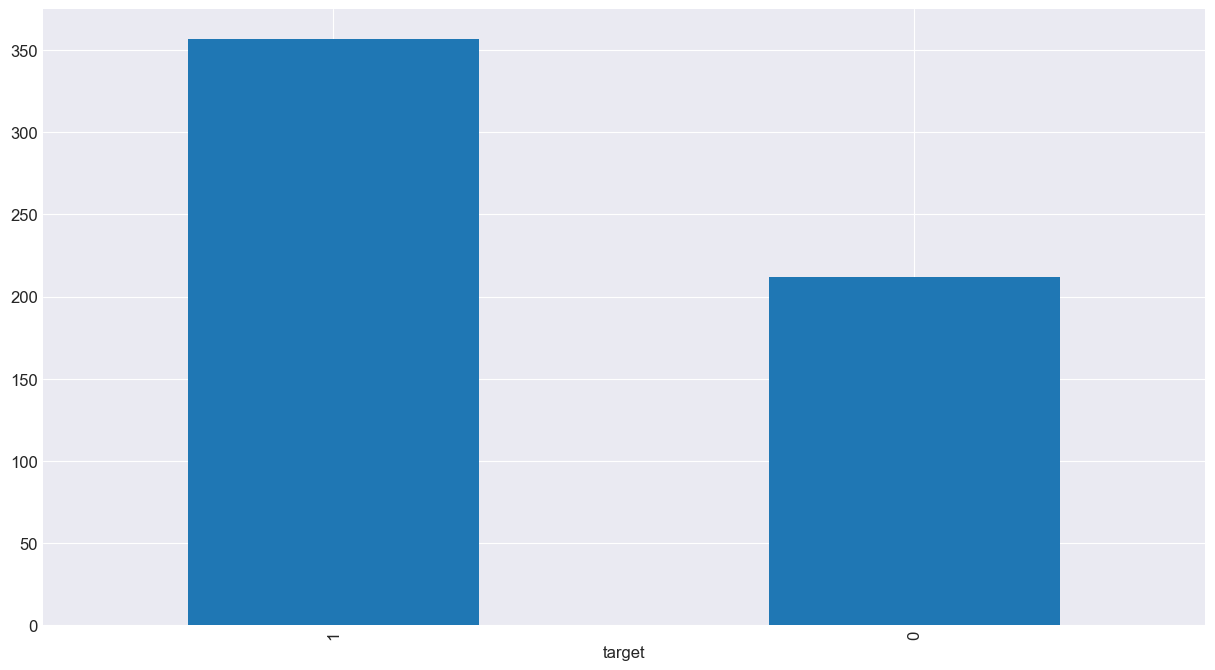

In [8]:
plt.figure(figsize=(12,8))
fig , ax = plt.subplots()
data_df['target'].value_counts().plot(ax=ax,kind='bar')

### Different ways of plotting data

## Train test split

In [10]:
from sklearn.model_selection import train_test_split
feature_df  = data_df.drop('target',axis=1)
labels=data_df['target']
X_train,X_test,y_train,_y_test = train_test_split(feature_df,labels,test_size=0.2,stratify=labels,random_state=24)

In [11]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
147,1,1,1,1,0,1,1,1,1,1,...,1,0,1,1,0,1,1,0,1,1
336,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
144,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
432,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
331,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1


In [12]:
X_train['total']=X_train.astype(np.int16).sum(axis=1)
X_train['target'] = y_train
X_train.sort_values('total',inplace=True)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0
6,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,15,0


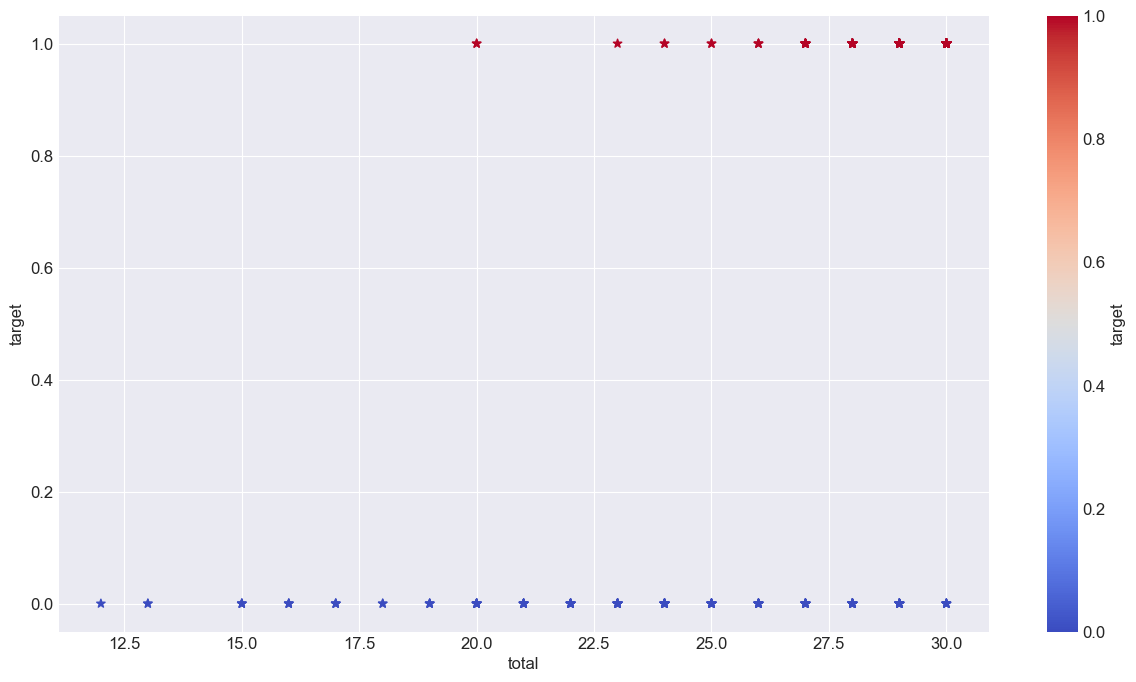

In [22]:
# Plot the data
X_train.plot.scatter('total', 'target',      # columns to plot
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c='target', # color as per target column
                     cmap=CMAP);    # using colormap

              count
total target       
12    0           1
13    0           2
15    0           4
16    0           4
17    0           4


<Axes: xlabel='total'>

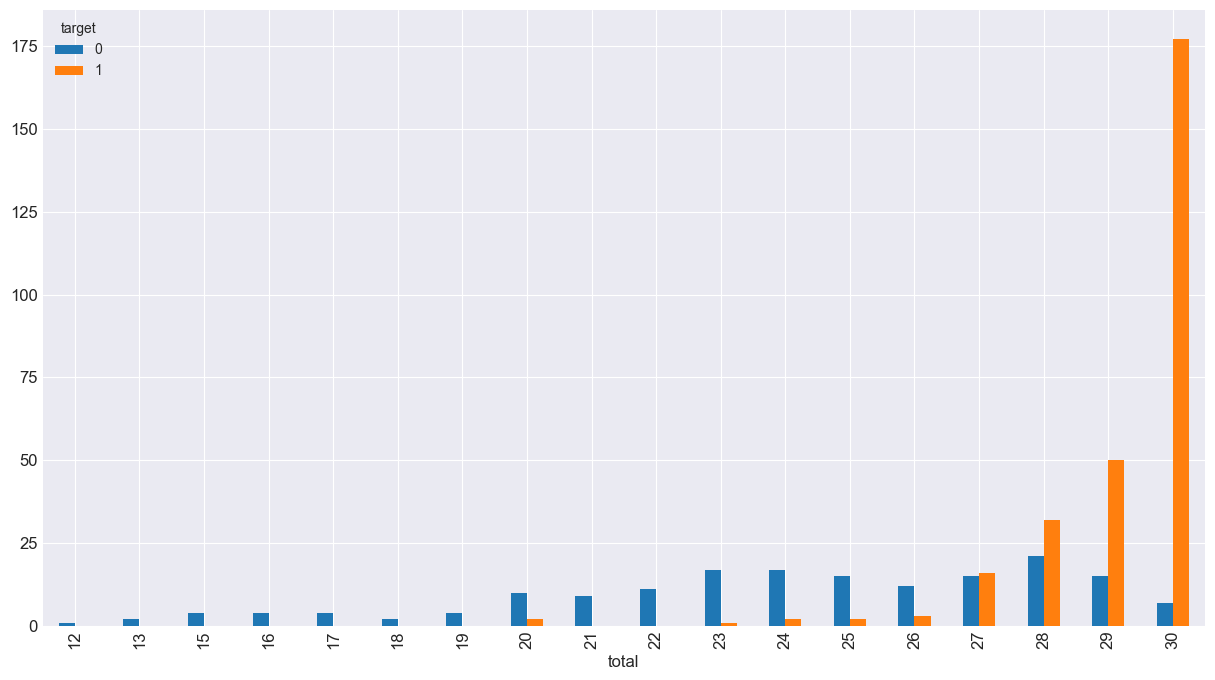

In [24]:
tmp_df = X_train.groupby(['total','target']).agg({'target':'count'})

tmp_df.columns=['count']

tmp_df.reset_index(inplace=True)
tmp_df.pivot(index='total',columns='target',values='count').plot(kind='bar')

In [27]:
accuracy = {}
for b in range(X_train.shape[1]):
    X_train['pred']=X_train['total']>=b
    accuracy[b]=accuracy_score(X_train['target'],X_train['pred'])

In [29]:
X_train.shape[1]

33

In [30]:
b_best = max(accuracy,key=accuracy.get)
b_best

27

In [31]:
accuracy[27]

0.8505494505494505

In [39]:
a=np.array([[0.1,0.2,0.3]])
a.shape

(1, 3)

array([[0.14]])